In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define Loading Functions

In [2]:
def loadNLP(folder, name):
    file = 'nlp/scenario_2/%s/%s.npy' % (folder, name)
    return np.load(file)

In [3]:
def loadData(folder):
    X_train = loadNLP(folder, 'train')
    y_train = loadNLP('labels', 'train')
    
    X_test = loadNLP(folder, 'test')
    y_test = loadNLP('labels', 'test')
    
    train = [X_train, y_train]
    test = [X_test, y_test]
    
    return train, test

# Load Data

In [4]:
train_uni, test_uni = loadData('unigram')

In [5]:
train_tfu, test_tfu = loadData('unigram_tfidf')

In [6]:
train_big, test_big = loadData('bigram')

In [7]:
train_tfb, test_tfb = loadData('bigram_tfidf')

In [8]:
train_runi, test_runi = loadData('reduced_unigram')

In [9]:
train_rtfu, test_rtfu = loadData('reduced_unigram_tfidf')

In [10]:
train_rbig, test_rbig = loadData('reduced_bigram')

In [11]:
train_rtfb, test_rtfb = loadData('reduced_bigram_tfidf')

# Define Machine Learning Classifier Functions

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [14]:
def genClassifiers():

    classifiers = [LogisticRegression(), RandomForestClassifier()]
    names = ['Logistic Regression', 'Random Forest']
    
    return classifiers, names

In [15]:
def evalClassifiers(train, test):
    
    clf_array, clf_names = genClassifiers()
    
    X_train = train[0]
    y_train = train[1]
    
    X_test = test[0]
    y_test = test[1]
    
    for i in range(0, len(clf_array)):
        start = time.time()
        clf_array[i].fit(X_train, y_train)
        end = time.time() - start
        
        y_pred = clf_array[i].predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        f_score = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        print(clf_names[i] + ': Completed in ' + str(end) + ' seconds')
        print(clf_names[i] + ' Accuracy: ' + str(accuracy))
        print(clf_names[i] + ' ROC AUC Score: ' + str(roc_auc))
        print(clf_names[i] + ' F Score: ' + str(f_score))
        print(clf_names[i] + ' Precision: ' + str(precision))
        print(clf_names[i] + ' Recall: ' + str(recall))
        print(" ")

# Evaluate Classifiers

## Unigram Classifiers

In [16]:
evalClassifiers(train_uni, test_uni)

Logistic Regression: Completed in 5.621959924697876 seconds
Logistic Regression Accuracy: 0.9532768244779822
Logistic Regression ROC AUC Score: 0.9222260886705022
Logistic Regression F Score: 0.9718063872255489
Logistic Regression Precision: 0.9744808606454841
Logistic Regression Recall: 0.9691465538691216
 
Random Forest: Completed in 21.788718938827515 seconds
Random Forest Accuracy: 0.9481083316105023
Random Forest ROC AUC Score: 0.90694491507637
Random Forest F Score: 0.9687849769929112
Random Forest Precision: 0.9684236698160119
Random Forest Recall: 0.9691465538691216
 


## Unigram-Tfidf Classifiers

In [17]:
evalClassifiers(train_tfu, test_tfu)

Logistic Regression: Completed in 1.6216790676116943 seconds
Logistic Regression Accuracy: 0.9460409344635105
Logistic Regression ROC AUC Score: 0.8794115786201363
Logistic Regression F Score: 0.9679321784002948
Logistic Regression Precision: 0.9560679611650486
Logistic Regression Recall: 0.9800945508833043
 
Random Forest: Completed in 17.18386220932007 seconds
Random Forest Accuracy: 0.9400454827372339
Random Forest ROC AUC Score: 0.8840799600430961
Random Forest F Score: 0.9640911342248638
Random Forest Precision: 0.9595760414099088
Random Forest Recall: 0.9686489176412043
 


## Bigram Classifiers

In [18]:
evalClassifiers(train_big, test_big)

Logistic Regression: Completed in 43.73493194580078 seconds
Logistic Regression Accuracy: 0.8532148025635725
Logistic Regression ROC AUC Score: 0.5733172382284394
Logistic Regression F Score: 0.9185593025923376
Logistic Regression Precision: 0.8520961906788679
Logistic Regression Recall: 0.9962677282906196
 
Random Forest: Completed in 1095.7167661190033 seconds
Random Forest Accuracy: 0.8689270208807112
Random Forest ROC AUC Score: 0.6343771425581787
Random Forest F Score: 0.9261244465159636
Random Forest Precision: 0.8709182555336401
Random Forest Recall: 0.9888031848718587
 


## Bigram-Tfidf Classifiers

In [19]:
evalClassifiers(train_tfb, test_tfb)

Logistic Regression: Completed in 20.368250131607056 seconds
Logistic Regression Accuracy: 0.8465991316931982
Logistic Regression ROC AUC Score: 0.5503494708204488
Logistic Regression F Score: 0.9153354632587859
Logistic Regression Precision: 0.8453108535300317
Logistic Regression Recall: 0.9980094550883304
 
Random Forest: Completed in 1119.6524140834808 seconds
Random Forest Accuracy: 0.8674798428778169
Random Forest ROC AUC Score: 0.6354536307064671
Random Forest F Score: 0.9251780086377962
Random Forest Precision: 0.8713720316622692
Random Forest Recall: 0.986066185618313
 


## Reduced Unigram Classifiers

In [20]:
evalClassifiers(train_runi, test_runi)

Logistic Regression: Completed in 2.410645008087158 seconds
Logistic Regression Accuracy: 0.8505271862724829
Logistic Regression ROC AUC Score: 0.7221328275045611
Logistic Regression F Score: 0.9105972548534687
Logistic Regression Precision: 0.9051130776794494
Logistic Regression Recall: 0.9161482955959194
 
Random Forest: Completed in 4.747530937194824 seconds
Random Forest Accuracy: 0.8248914616497829
Random Forest ROC AUC Score: 0.6083648513083635
Random Forest F Score: 0.8987689733476754
Random Forest Precision: 0.8647654093836247
Random Forest Recall: 0.9355561084846977
 


## Reduced Unigram-Tfidf Classifiers

In [21]:
evalClassifiers(train_rtfu, test_rtfu)

Logistic Regression: Completed in 1.7357051372528076 seconds
Logistic Regression Accuracy: 0.8397767211081248
Logistic Regression ROC AUC Score: 0.6163486276373047
Logistic Regression F Score: 0.908207982944451
Logistic Regression Precision: 0.8666365280289331
Logistic Regression Recall: 0.9539686489176412
 
Random Forest: Completed in 3.9046788215637207 seconds
Random Forest Accuracy: 0.8608641720074426
Random Forest ROC AUC Score: 0.6475381911470637
Random Forest F Score: 0.9205337111819578
Random Forest Precision: 0.8759550561797753
Random Forest Recall: 0.9698930082109978
 


## Reduced Bigram Classifiers

In [22]:
evalClassifiers(train_rbig, test_rbig)

Logistic Regression: Completed in 10.40409517288208 seconds
Logistic Regression Accuracy: 0.7719660946867893
Logistic Regression ROC AUC Score: 0.4893721509869684
Logistic Regression F Score: 0.8697603022788996
Logistic Regression Precision: 0.8276404494382023
Logistic Regression Recall: 0.9163971137098781
 
Random Forest: Completed in 16.83604598045349 seconds
Random Forest Accuracy: 0.7992557370270829
Random Forest ROC AUC Score: 0.5505832320925482
Random Forest F Score: 0.8846382321492218
Random Forest Precision: 0.8465211459754434
Random Forest Recall: 0.9263498382682259
 


## Reduced Bigram-Tfidf Classifiers

In [23]:
evalClassifiers(train_rtfb, test_rtfb)

Logistic Regression: Completed in 8.269199848175049 seconds
Logistic Regression Accuracy: 0.8124870787678313
Logistic Regression ROC AUC Score: 0.4918486212495536
Logistic Regression F Score: 0.8964020559680183
Logistic Regression Precision: 0.8285472972972973
Logistic Regression Recall: 0.9763622791739238
 
Random Forest: Completed in 19.626532077789307 seconds
Random Forest Accuracy: 0.7862311350010337
Random Forest ROC AUC Score: 0.5057457821071184
Random Forest F Score: 0.8784387491182695
Random Forest Precision: 0.8326275908179185
Random Forest Recall: 0.929584473749689
 


# Define Neural Network Functions

In [24]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

Limited tf.compat.v2.summary API due to missing TensorBoard installation
Limited tf.summary API due to missing TensorBoard installation


In [25]:
def DNN(train, test, iterations = 50, early_stop = False, info = 0):
    X_train = train[0]
    y_train = train[1]
    
    X_test = test[0]
    y_test = test[1]
    
    dim = len(X_train[0])
    
    model = models.Sequential()
    if dim >= 40000:
        model.add(layers.Dense(500, kernel_regularizer = l2(.001),
                               activation = 'relu', input_shape = (dim,)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(128, kernel_regularizer = l2(.001),
                               activation = 'relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(32, kernel_regularizer = l2(.001),
                               activation = 'relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(4, kernel_regularizer = l2(.001),
                               activation = 'relu'))
    elif dim >= 9000:
        model.add(layers.Dense(200, kernel_regularizer = l2(.001),
                               activation = 'relu', input_shape = (dim,)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(64, kernel_regularizer = l2(.001),
                               activation = 'relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(4, kernel_regularizer = l2(.001),
                               activation = 'relu'))        
    elif dim >= 1000:
        model.add(layers.Dense(100, kernel_regularizer = l2(.001),
                               activation = 'relu', input_shape = (dim,)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(16, kernel_regularizer = l2(.001),
                               activation = 'relu'))
    else:
        model.add(layers.Dense(16, kernel_regularizer = l2(.001),
                               activation = 'relu', input_shape = (dim,)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(4, kernel_regularizer = l2(.001),
                               activation = 'relu', input_shape = (dim, )))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    
    model.summary()
    model.compile(loss = 'binary_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
    
    start = time.time()
    
    callback = [EarlyStopping(monitor = 'val_loss', min_delta = .0001)]
    if early_stop:
        history = model.fit(X_train, y_train,
                            epochs = iterations,
                            verbose = info,
                            batch_size = 128,
                            callbacks = callback,
                            validation_data = (X_test, y_test))
    else:
        history = model.fit(X_train, y_train,
                            epochs = iterations,
                            verbose = info,
                            batch_size = 128,
                            validation_data = (X_test, y_test))
        
    end = time.time() - start
    
    test_vals = model.evaluate(X_test, y_test)
    
    print("Training Time:  ", end)
    print("Model Loss:     ", test_vals[0])
    print("Model Accuracy: ", test_vals[1])
    
    return model, history

In [26]:
def plotFigures(hist, epoch_range):
    
    training_loss = hist.history['loss']
    training_acc = hist.history['accuracy']
    
    validation_loss = hist.history['val_loss']
    validation_acc = hist.history['val_accuracy']
    
    epochs = range(1, epoch_range + 1)
    
    f = plt.figure(1)
    plt.title("Training and Validation Loss")
    plt.plot(epochs, training_loss, 'r', label = 'Training Loss')
    plt.plot(epochs, validation_loss, 'b', label = 'Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    g = plt.figure(2)
    plt.title("Training and Validation Accuracy")
    plt.plot(epochs, training_acc, 'r', label = 'Training Acc')
    plt.plot(epochs, validation_acc, 'b', label = 'Validation Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

In [27]:
def evaluate(model, history, test, name):
    X_test = test[0]
    y_test = test[1]
    epoch_range = len(history.history['loss'])
    
    pred_sigmoid = model.predict(X_test)
    pred = []
    for p in pred_sigmoid:
        if p < .5:
            pred.append(0)
        else:
            pred.append(1)
    y_pred = np.asarray(pred)
    
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(name + ' Evaluation: ')
    print('Accuracy:       ', acc)
    print('ROC AUC Score:  ', roc_auc)
    print('F1 Score:       ', f)
    print('Precision:      ', precision)
    print('Recall:         ', recall)
    
    plotFigures(history, epoch_range)

# Training Neural Networks

In [28]:
dnn_uni, hist_uni = DNN(train_uni, test_uni)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               2400200   
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                12864     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 2,413,329
Trainable params: 2,413,329
Non-trainable params: 0
______________________________________________

In [29]:
dnn_tfu, hist_tfu = DNN(train_tfu, test_tfu)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               2400200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                12864     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 260       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 2,413,329
Trainable params: 2,413,329
Non-trainable params: 0
____________________________________________

In [30]:
dnn_big, hist_big = DNN(train_big, test_big)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 500)               35500500  
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               64128     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 4)                

In [31]:
dnn_tfb, hist_tfb = DNN(train_tfb, test_tfb)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 500)               35500500  
_________________________________________________________________
dropout_7 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               64128     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 4)                

In [32]:
dnn_runi, hist_runi = DNN(train_runi, test_runi)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                9616      
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 5         
Total params: 9,689
Trainable params: 9,689
Non-trainable params: 0
_________________________________________________________________
4837/4837 [==============================] - 0s 38us/sample - loss: 0.4010 - accuracy: 0.8511
Training Time:   18.916073083877563
Model Loss:      0.4009510824718282
Model Accuracy:  0.8511474


In [33]:
dnn_rtfu, hist_rtfu = DNN(train_rtfu, test_rtfu)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                9616      
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
Total params: 9,689
Trainable params: 9,689
Non-trainable params: 0
_________________________________________________________________
4837/4837 [==============================] - 0s 33us/sample - loss: 0.4893 - accuracy: 0.8398
Training Time:   18.2583749294281
Model Loss:      0.48930999116018237
Model Accuracy:  0.8397767


In [34]:
dnn_rbig, hist_rbig = DNN(train_rbig, test_rbig)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 100)               355100    
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 17        
Total params: 356,733
Trainable params: 356,733
Non-trainable params: 0
_________________________________________________________________
4837/4837 [==============================] - 0s 80us/sample - loss: 0.8191 - accuracy: 0.7008
Training Time:   71.42533230781555
Model Loss:      0.8191478769222714
Model Accuracy:  0.7008476


In [35]:
dnn_rtfb, hist_rtfb = DNN(train_rtfb, test_rtfb)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 100)               355100    
_________________________________________________________________
dropout_13 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 17        
Total params: 356,733
Trainable params: 356,733
Non-trainable params: 0
_________________________________________________________________
4837/4837 [==============================] - 0s 72us/sample - loss: 0.8570 - accuracy: 0.7195
Training Time:   69.47904896736145
Model Loss:      0.856953222581072
Model Accuracy:  0.7194542


# Evaluate Neural Networks

DNN Unigram Evaluation: 
Accuracy:        0.953070084763283
ROC AUC Score:   0.9186938144060213
F1 Score:        0.9717274878565201
Precision:       0.9728179551122195
Recall:          0.9706394625528738


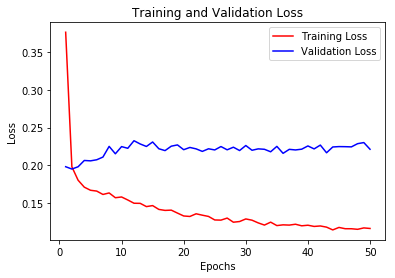

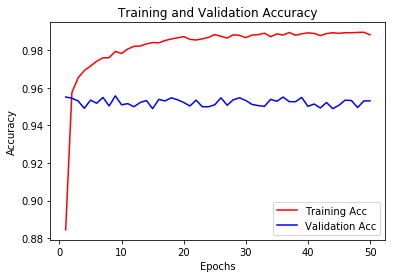

In [36]:
evaluate(dnn_uni, hist_uni, test_uni, 'DNN Unigram')

DNN Unigram-Tfidf Evaluation: 
Accuracy:        0.9549307421955757
ROC AUC Score:   0.9295502536545541
F1 Score:        0.9727431857964491
Precision:       0.9776325709977381
Recall:          0.9679024632993282


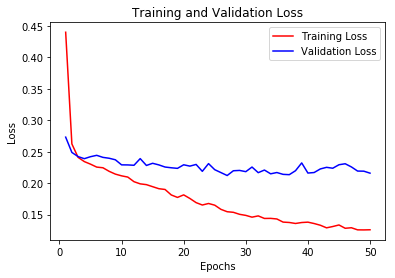

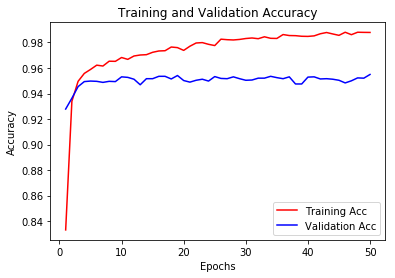

In [37]:
evaluate(dnn_tfu, hist_tfu, test_tfu, 'DNN Unigram-Tfidf')

DNN Bigram Evaluation: 
Accuracy:        0.8778168286127765
ROC AUC Score:   0.6918183858943856
F1 Score:        0.9297348710022589
Precision:       0.8902550091074681
Recall:          0.9728788255785021


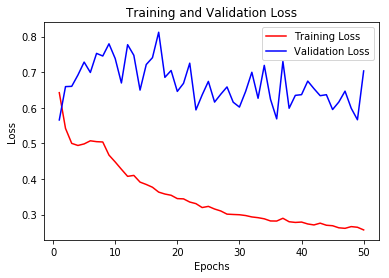

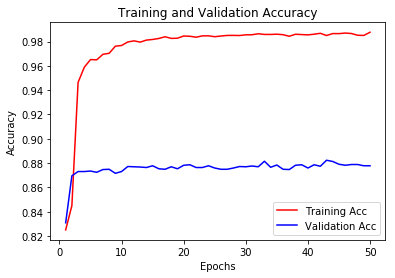

In [38]:
evaluate(dnn_big, hist_big, test_big, 'DNN Bigram')

DNN Bigram-Tfidf Evaluation: 
Accuracy:        0.8790572669009716
ROC AUC Score:   0.6925648402362616
F1 Score:        0.9304978020672449
Precision:       0.8904047294224647
Recall:          0.9743717342622543


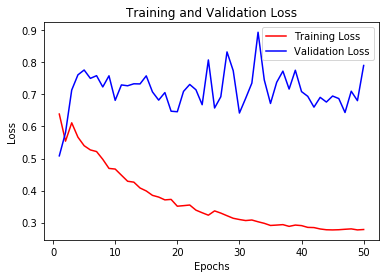

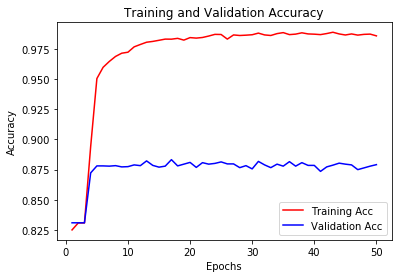

In [39]:
evaluate(dnn_tfb, hist_tfb, test_tfb, 'DNN Bigram-Tfidf')

DNN Reduced Unigram Evaluation: 
Accuracy:        0.8511474054165805
ROC AUC Score:   0.7215323789019272
F1 Score:        0.911045218680504
Precision:       0.9047852760736196
Recall:          0.9173923861657128


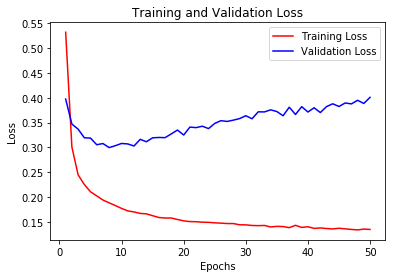

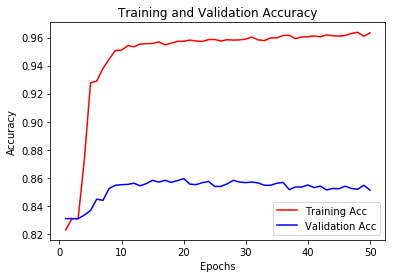

In [40]:
evaluate(dnn_runi, hist_runi, test_runi, 'DNN Reduced Unigram')

DNN Reduced Unigram-Tfidf Evaluation: 
Accuracy:        0.8397767211081248
ROC AUC Score:   0.6772033634855463
F1 Score:        0.9054070548028805
Precision:       0.8885960709151892
Recall:          0.9228663846728041


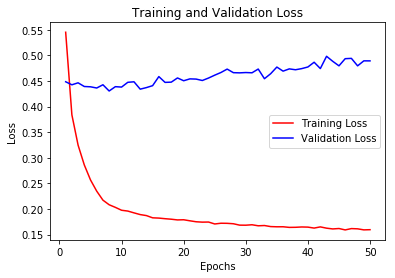

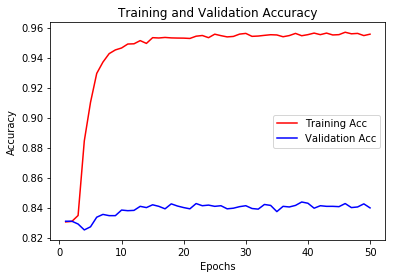

In [41]:
evaluate(dnn_rtfu, hist_rtfu, test_rtfu, 'DNN Reduced Unigram-Tfidf')

DNN Reduced Bigram Evaluation: 
Accuracy:        0.7008476328302667
ROC AUC Score:   0.4981802513853816
F1 Score:        0.8171363578920764
Precision:       0.83025166923472
Recall:          0.8044289624284648


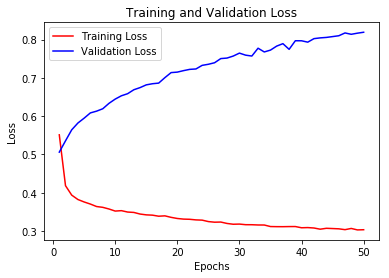

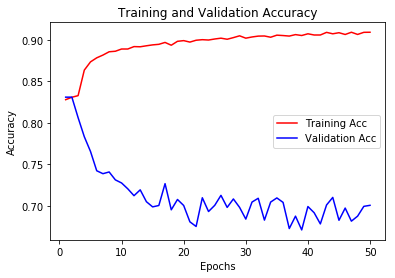

In [42]:
evaluate(dnn_rbig, hist_rbig, test_rbig, 'DNN Reduced Bigram')

DNN Reduced Bigram-Tfidf Evaluation: 
Accuracy:        0.7194542071531941
ROC AUC Score:   0.5020744982117338
F1 Score:        0.8310718287065854
Precision:       0.8315894369706028
Recall:          0.8305548643941278


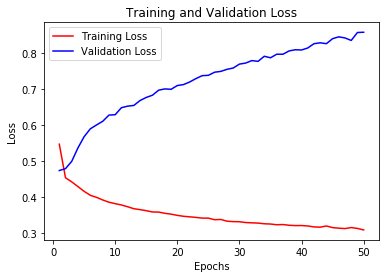

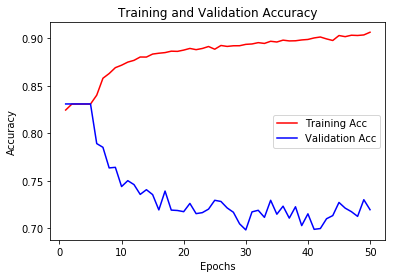

In [43]:
evaluate(dnn_rtfb, hist_rtfb, test_rtfb, 'DNN Reduced Bigram-Tfidf')

# Training Neural Networks - Early Stopping

In [44]:
dnn_uni_s, hist_uni_s = DNN(train_uni, test_uni, early_stop = True)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 200)               2400200   
_________________________________________________________________
dropout_14 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                12864     
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 260       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 5         
Total params: 2,413,329
Trainable params: 2,413,329
Non-trainable params: 0
____________________________________________

In [45]:
dnn_tfu_s, hist_tfu_s = DNN(train_tfu, test_tfu, early_stop = True)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 200)               2400200   
_________________________________________________________________
dropout_16 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 64)                12864     
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 4)                 260       
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 5         
Total params: 2,413,329
Trainable params: 2,413,329
Non-trainable params: 0
____________________________________________

In [46]:
dnn_big_s, hist_big_s = DNN(train_big, test_big, early_stop = True)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 500)               35500500  
_________________________________________________________________
dropout_18 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               64128     
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_20 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 4)               

In [47]:
dnn_tfb_s, hist_tfb_s = DNN(train_tfb, test_tfb, early_stop = True)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 500)               35500500  
_________________________________________________________________
dropout_21 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               64128     
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_23 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 4)               

In [48]:
dnn_runi_s, hist_runi_s = DNN(train_runi, test_runi, early_stop = True)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 16)                9616      
_________________________________________________________________
dropout_24 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 5         
Total params: 9,689
Trainable params: 9,689
Non-trainable params: 0
_________________________________________________________________
4837/4837 [==============================] - 0s 33us/sample - loss: 0.3325 - accuracy: 0.8410
Training Time:   3.0429141521453857
Model Loss:      0.3324917486895947
Model Accuracy:  0.8410172


In [49]:
dnn_rtfu_s, hist_rtfu_s = DNN(train_rtfu, test_rtfu, early_stop = True)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 16)                9616      
_________________________________________________________________
dropout_25 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 5         
Total params: 9,689
Trainable params: 9,689
Non-trainable params: 0
_________________________________________________________________
4837/4837 [==============================] - 0s 31us/sample - loss: 0.4381 - accuracy: 0.8309
Training Time:   2.916123867034912
Model Loss:      0.4381181904173893
Model Accuracy:  0.8308869


In [50]:
dnn_rbig_s, hist_rbig_s = DNN(train_rbig, test_rbig, early_stop = True)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 100)               355100    
_________________________________________________________________
dropout_26 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 17        
Total params: 356,733
Trainable params: 356,733
Non-trainable params: 0
_________________________________________________________________
4837/4837 [==============================] - 0s 74us/sample - loss: 0.5363 - accuracy: 0.8309
Training Time:   6.543048858642578
Model Loss:      0.5363487727217667
Model Accuracy:  0.8308869


In [51]:
dnn_rtfb_s, hist_rtfb_s = DNN(train_rtfb, test_rtfb, early_stop = True)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 100)               355100    
_________________________________________________________________
dropout_27 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 17        
Total params: 356,733
Trainable params: 356,733
Non-trainable params: 0
_________________________________________________________________
4837/4837 [==============================] - 0s 74us/sample - loss: 0.4808 - accuracy: 0.8309
Training Time:   4.793769836425781
Model Loss:      0.4807605543288412
Model Accuracy:  0.8308869


# Evaluate Neural Networks - Early Stopping

DNN Early Stop Unigram Evaluation: 
Accuracy:        0.953070084763283
ROC AUC Score:   0.9172333007456636
F1 Score:        0.9717485998755445
Precision:       0.9721115537848606
Recall:          0.97138591689475


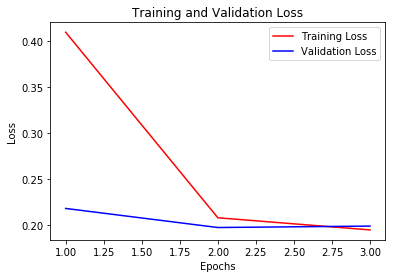

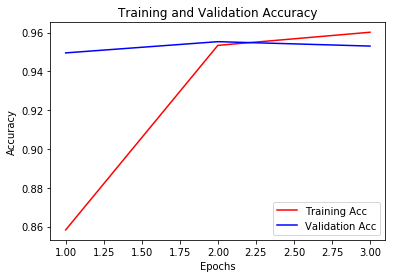

In [52]:
evaluate(dnn_uni_s, hist_uni_s, test_uni, 'DNN Early Stop Unigram')

DNN Early Stop Unigram-Tfidf Evaluation: 
Accuracy:        0.9514161670456894
ROC AUC Score:   0.9147775146294709
F1 Score:        0.9707456740943607
Precision:       0.971350274040857
Recall:          0.9701418263249565


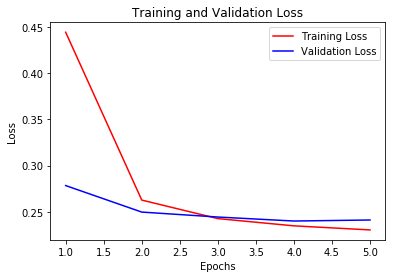

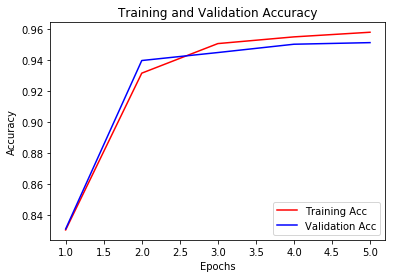

In [53]:
evaluate(dnn_tfu_s, hist_tfu_s, test_tfu, 'DNN Early Stop Unigram-Tfidf')

DNN Early Stop Bigram Evaluation: 
Accuracy:        0.8308869133760596
ROC AUC Score:   0.5
F1 Score:        0.9076332429990966
Precision:       0.8308869133760596
Recall:          1.0


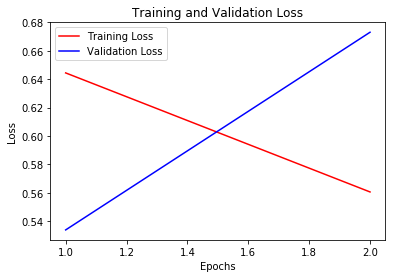

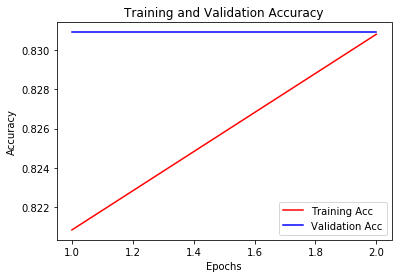

In [54]:
evaluate(dnn_big_s, hist_big_s, test_big, 'DNN Early Stop Bigram')

DNN Early Stop Bigram-Tfidf Evaluation: 
Accuracy:        0.8308869133760596
ROC AUC Score:   0.5
F1 Score:        0.9076332429990966
Precision:       0.8308869133760596
Recall:          1.0


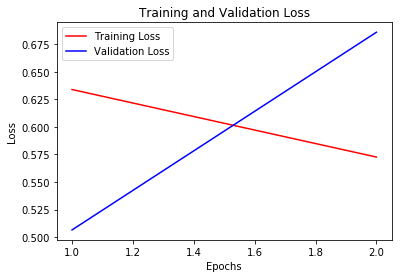

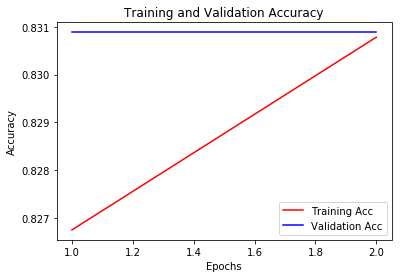

In [55]:
evaluate(dnn_tfb_s, hist_tfb_s, test_tfb, 'DNN Early Stop Bigram-Tfidf')

DNN Early Stop Reduced Unigram Evaluation: 
Accuracy:        0.84101715939632
ROC AUC Score:   0.6443580036391932
F1 Score:        0.9077605853424494
Precision:       0.8763316350162113
Recall:          0.9415277432197064


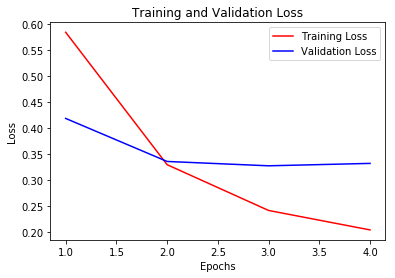

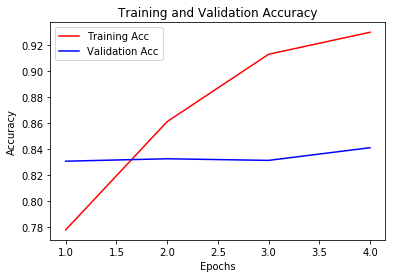

In [56]:
evaluate(dnn_runi_s, hist_runi_s, test_runi, 'DNN Early Stop Reduced Unigram')

DNN Early Stop Reduced Unigram-Tfidf Evaluation: 
Accuracy:        0.8308869133760596
ROC AUC Score:   0.5
F1 Score:        0.9076332429990966
Precision:       0.8308869133760596
Recall:          1.0


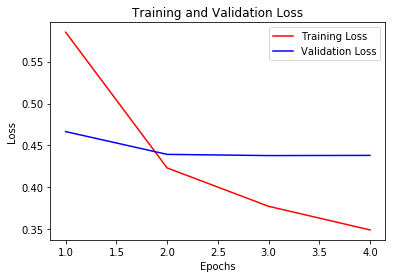

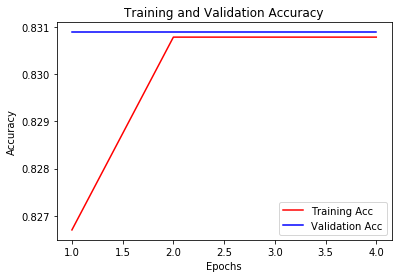

In [57]:
evaluate(dnn_rtfu_s, hist_rtfu_s, test_rtfu, 'DNN Early Stop Reduced Unigram-Tfidf')

DNN Early Stop Reduced Bigram Evaluation: 
Accuracy:        0.8308869133760596
ROC AUC Score:   0.5
F1 Score:        0.9076332429990966
Precision:       0.8308869133760596
Recall:          1.0


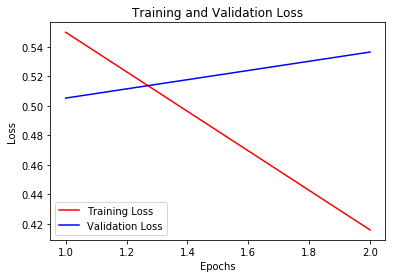

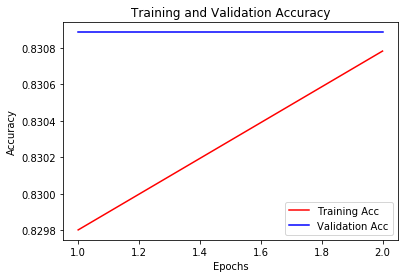

In [58]:
evaluate(dnn_rbig_s, hist_rbig_s, test_rbig, 'DNN Early Stop Reduced Bigram')

DNN Early Stop Reduced Bigram-Tfidf Evaluation: 
Accuracy:        0.8308869133760596
ROC AUC Score:   0.5
F1 Score:        0.9076332429990966
Precision:       0.8308869133760596
Recall:          1.0


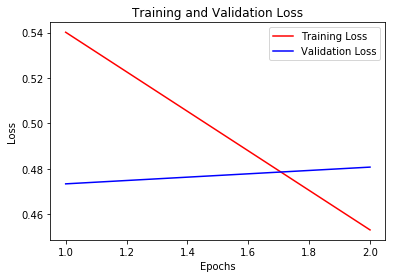

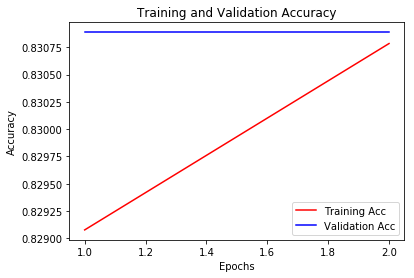

In [59]:
evaluate(dnn_rtfb_s, hist_rtfb_s, test_rtfb, 'DNN Early Stop Reduced Bigram-Tfidf')